<a href="https://colab.research.google.com/github/PrasadSalimath/EDA-Twitter-Data-Analysis/blob/main/Twitter_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Data Analysis

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json
import os
import math

### Twitter data loading and preprocessing

In [ ]:
# Filter all .zip files to work on
dataset_zipped = [file for file in os.listdir() if '.zip' in file]
tweets_missed = []

for zip_files in dataset_zipped:
    with ZipFile(zip_files, 'r') as my_zip_files:
        for filename in my_zip_files.namelist():
            # extract one file at a time and not all at once
            my_zip_files.extract(filename)
            with open(filename) as json_file:
                j_data = json_file.readlines()
                new_filename = zip_files.replace('zip','json')
                # write to new file only required data
                with open(new_filename, 'w') as f:
                    for i in range(len(j_data)):
                        json_str = json.loads(j_data[i])
                        if 'tweets_missed' in json_str:
                            tweets_missed.append(json_str['tweets_missed'])
                        else:
                            data = {'tweet_id':json_str['id'], 'created_at': json_str['created_at'], 'tweet_text':json_str['text'], 'user_id':json_str['user']['id']}
                            data['user_name'] =  str(json_str['user']['name']).encode('ascii', 'ignore').decode('utf-8').strip() +':' + json_str['user']['screen_name']
                            data['verified'] = json_str['user']['verified']
                            data['country'] = json_str['place']['country_code'] if json_str['place'] is not None else ''
                            data['coordinates'] = json_str['coordinates']['coordinates'] if json_str['coordinates'] is not None else float('NaN')
                            if json_str['entities']['user_mentions'] is not None:
                                data['user_mentions'] = ':'.join(f'{i["id"]}' for i in json_str['entities']['user_mentions'])
                            json.dump(data, f)
                            f.write('\n')
            # remove/delete the extracted json file post processing 
            os.remove(filename)
            

In [ ]:
json_files = [file for file in os.listdir() if file.endswith('.json')]
extracted_dataset = []

for jfile in json_files:
    with open(jfile, 'r') as json_file:
        j_data = json_file.readlines()
        for row in range(len(j_data)):
            json_str = json.loads(j_data[row])
            if isinstance(json_str['coordinates'], list):
                long = json_str['coordinates'][0]
                lat = json_str['coordinates'][1]
            else:
                long = lat = json_str['coordinates']
            data = [json_str['tweet_id'], pd.to_datetime(json_str['created_at']), json_str['tweet_text'], json_str['country'], json_str['user_id'], json_str['user_name'], json_str['verified'], long, lat, json_str['user_mentions']]
            extracted_dataset.append(data)
col=['tweet_id', 'tweeted_at', 'tweet_text', 'country', 'user_id', 'user_name', 'verified', 'long', 'lat', 'user_mentions']
tweet_df = pd.DataFrame(extracted_dataset, columns=col)
tweet_df

,tweet_id,tweeted_at,tweet_text,country,user_id,user_name,verified,long,lat,user_mentions
0,1399500939766210560,2021-05-31 23:00:00+00:00,klingel,,1092190045,Rathausuhr Neuklln:rh_neukoelln,False,13.435000,52.481388,
1,1399500940110094340,2021-05-31 23:00:00+00:00,@HelenaBrts @Sibirskykot @Chadaew Описание сос...,RU,1199787888,Selius Moonty:SeliusM,False,NaN,NaN,1186645124:922162684325498880:516260791
2,1399500942043660290,2021-05-31 23:00:00+00:00,po no que un pavo de 51 años me estaba tirando...,GB,398768344,:AleStarbucks,False,NaN,NaN,
3,1399500944417640451,2021-05-31 23:00:01+00:00,Hayırlısı ya,TR,747259495,Emre zgltekin:emreozgultekin,False,NaN,NaN,
4,1399500944472166412,2021-05-31 23:00:01+00:00,"01:00\nTemp. 13,5°C App. 12,9°C\nUmid. 77% \nP...",IT,2858863684,BusallettaInfo:sulsitodisimone,False,8.987778,44.497500,
...,...,...,...,...,...,...,...,...,...,...
13860681,1410372570411585539,2021-06-30 22:59:58+00:00,All my pictures will have this filter for now ...,GB,1164371173586743296,I:zachary202002,False,NaN,NaN,
13860682,1410372571007176704,2021-06-30 22:59:59+00:00,Hola\nTe echo de menos \nAdiós\n🤍,ES,878284597,Alberto:larraya_99,False,NaN,NaN,
13860683,1410372573309849601,2021-06-30 22:59:59+00:00,Acho que vou sozinha para as piscinas amanhã,PT,1061318130474070016,:anokasguida22,False,NaN,NaN,
13860684,1410372573544816641,2021-06-30 22:59:59+00:00,@maciek1711 Batem ich! I niech jadą!,ES,1351078743054426114,Marcin Zasadowski:MZasadowski,False,NaN,NaN,2845164707


In [ ]:
# Reduced DF for Part 3

json_files = [file for file in os.listdir() if file.endswith('.json')]
extracted_dataset = []

for jfile in json_files:
    with open(jfile, 'r') as json_file:
        j_data = json_file.readlines()
        for row in range(len(j_data)):
            json_str = json.loads(j_data[row])
            # if isinstance(json_str['coordinates'], list):
            #     long = json_str['coordinates'][0]
            #     lat = json_str['coordinates'][1]
            # else:
            #     long = lat = json_str['coordinates']
            data = [json_str['tweet_id'], json_str['country'], json_str['user_id'], json_str['user_name'], json_str['user_mentions']]
            extracted_dataset.append(data)
col=['tweet_id', 'country', 'user_id', 'user_name', 'user_mentions']
tweet_df_pt3 = pd.DataFrame(extracted_dataset, columns=col)
tweet_df_pt3

,tweet_id,country,user_id,user_name,user_mentions
0,1399500939766210560,,1092190045,Rathausuhr Neuklln:rh_neukoelln,
1,1399500940110094340,RU,1199787888,Selius Moonty:SeliusM,1186645124:922162684325498880:516260791
2,1399500942043660290,GB,398768344,:AleStarbucks,
3,1399500944417640451,TR,747259495,Emre zgltekin:emreozgultekin,
4,1399500944472166412,IT,2858863684,BusallettaInfo:sulsitodisimone,
...,...,...,...,...,...
13860681,1410372570411585539,GB,1164371173586743296,I:zachary202002,
13860682,1410372571007176704,ES,878284597,Alberto:larraya_99,
13860683,1410372573309849601,PT,1061318130474070016,:anokasguida22,
13860684,1410372573544816641,ES,1351078743054426114,Marcin Zasadowski:MZasadowski,2845164707


### Part 1: Basic Statistics 
### Task 1. Count of tweets/ duplicates/ anomalies

In [ ]:
# Part 1: Basic Statistics 
# Task 1. Count of tweets/ duplicates/ anomalies 

# check if there are duplicate tweets
if tweet_df['tweet_id'].duplicated().any():
  print('Duplicate tweets found...')
else:
  print('No duplicate tweets found...')

# total number of tweets in the dataset
print('Total number of unique tweets in the entire dataset: {0}'.format(len(tweet_df.tweet_id.drop_duplicates())))
print('Total number of tweets (including duplicates): {0}'.format(len(tweet_df.tweet_id)))
print('Total number of missing tweets in the dataset: {0}'.format(sum(tweets_missed)))

Total number of unique tweets in the entire dataset: 13857163
Total number of tweets (including duplicates): 13860686
Total number of missing tweets in the dataset: 11499


In [ ]:
# NOT IN USE
from io import StringIO
import os

# import re
# dir = [re.search('_(\d+)\.json$', f) for f in os.listdir()]

json_files = [f for f in os.listdir() if '.json' in f]

col=['tweet_id', 'tweeted_at', 'tweet_text', 'user_id']

# complete dataset built from all json files
extracted_dataset = []

for j_file in json_files:
  with open(j_file) as json_file:
    j_data = json_file.readlines()
    from io import StringIO
    id = []
    for i in range(len(j_data)):
      # js = json.dumps(j_data[i])
      json_str = json.loads(j_data[i])
      data = [json_str['id'], pd.to_datetime(json_str['created_at']), json_str['text'], json_str['user']['id']]
      extracted_dataset.append(data)
    #   jdf.append(pd.read_json(StringIO(j_data[i]), lines=True))
    #   id.append(jdf.id)

tweet_df = pd.DataFrame(extracted_dataset, columns=col)
# tweet_df['tweet_id'].value_counts()
# pd.Timestamp('Mon May 31 23:00:00 +0000 2021').date()
# pd.to_datetime(tweet_df['tweeted_at'])

# check if there are duplicate tweets
if tweet_df['tweet_id'].duplicated().any():
  print('Duplicate tweets found...')
else:
  print('No duplicate tweets found...')
# total number of tweets
len(tweet_df.tweet_id)

### Part 1. Task 2: Plot a time-series of the number of tweets by day

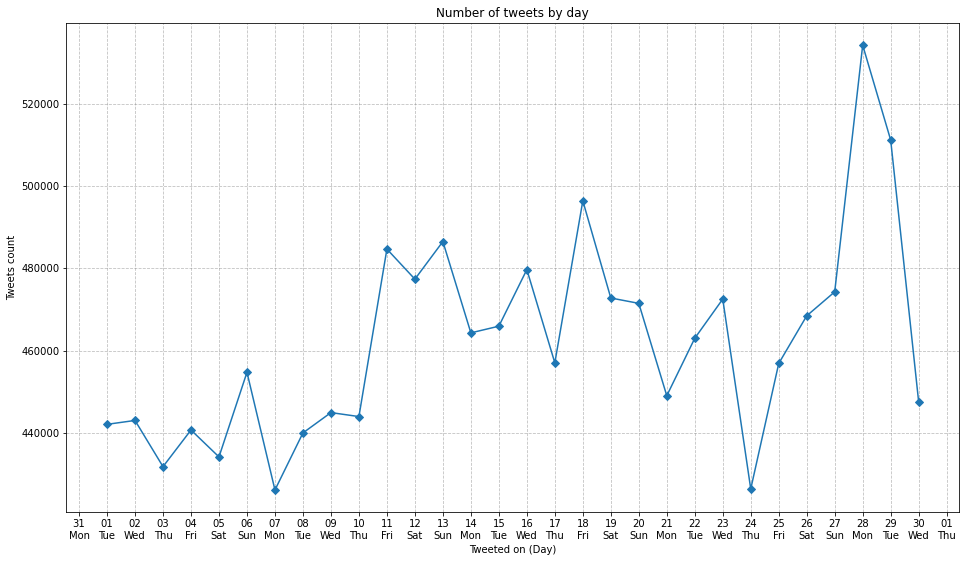

In [ ]:
# Part 1: Basic Statistics 
# Task 2. Plot a time-series of the number of tweets by day

import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, WeekdayLocator, DateFormatter

tweet_df_plot = tweet_df.copy()
tweet_df_plot = tweet_df_plot.set_index('tweeted_at')

# convert to local(UK) timezone
gmt_offset = 1
tweet_df_plot.index = tweet_df_plot.index + pd.to_timedelta(gmt_offset, unit='h')

# group tweets by day 
df_plot = tweet_df_plot.groupby(tweet_df_plot.index.date).agg({'tweet_id': 'count'})

# plot number of tweets by day
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('Number of tweets by day')
ax.set_xlabel('Tweeted on (Day)')
ax.set_ylabel('Tweets count')
ax.xaxis.set_minor_locator(WeekdayLocator(byweekday=(1),interval=1))
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d\n%a'))
plt.plot(df_plot.index, df_plot['tweet_id'], marker='D')
plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)


In [ ]:
# import matplotlib.pyplot as plt
df_user_tweets = tweet_df_plot.groupby('user_id').agg({'tweet_id': 'count'})
# plt.plot(df_user_tweets.index, df_user_tweets['tweet_id'])
# plt.clf()
# plt.show()
# tweet_df_plot.query('user_id == 1092190045')
df_tem = df_user_tweets.sort_values(by='tweet_id').tail(15)
plt.hist(df_tem)

### Part 1. Task 3: Box and whisker diagram to compare the average number of tweets on the weekdays in the dataset to the numbers for weekend days

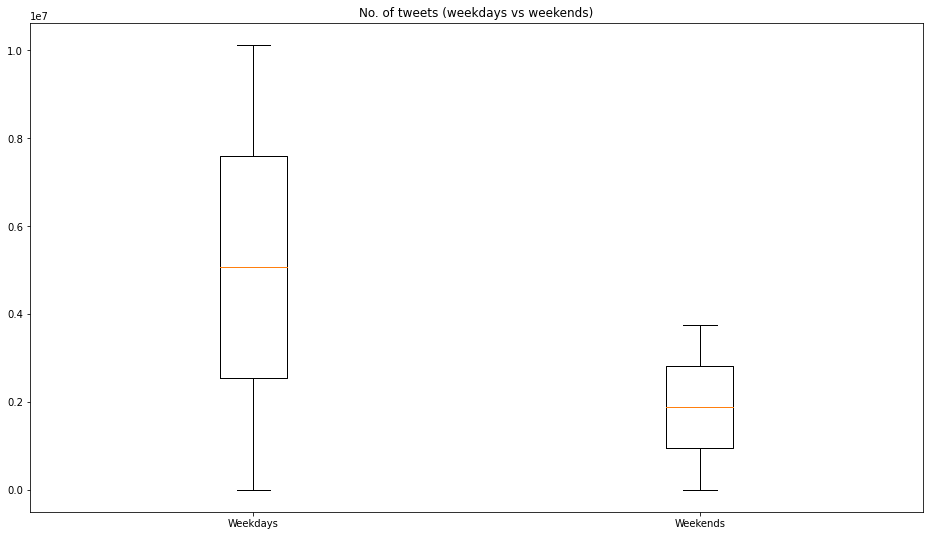

In [ ]:
# Part 1: Basic Statistics 
# Task 3. Box and whisker diagram to compare the average number of tweets on the weekdays in the dataset to the numbers for weekend days

tweet_df_box_plot = tweet_df_plot.copy()
# # len([date for date in tweet_df_box_plot.index if date.weekday() >= 0 and date.weekday() <= 4])
# # len([date for date in tweet_df_box_plot.index if date.weekday() >= 5 and date.weekday() <= 6])

tweet_df_box_plot_weekdays = tweet_df_box_plot.groupby(tweet_df_box_plot.index.weekday.isin([0,1,2,3,4])).agg({'tweet_id': 'count'})
tweet_count_weekdays = tweet_df_box_plot_weekdays[tweet_df_box_plot_weekdays.index].values[0][0]

# # if tweet_df_box_plot_weekdays.index[0]:
# #   tweet_count_weekdays = range(tweet_df_box_plot_weekdays.values[0][0])
# # else:
# #   tweet_count_weekdays = 0

tweet_df_box_plot_weekends = tweet_df_box_plot.groupby(tweet_df_box_plot.index.weekday.isin([5,6])).agg({'tweet_id': 'count'})
tweet_count_weekends = tweet_df_box_plot_weekends[tweet_df_box_plot_weekends.index].values[0][0]

# # if tweet_df_box_plot_weekends.index[0]:
# #   tweet_count_weekends = range(tweet_df_box_plot_weekends.values[0][0])
# # else:
# #   tweet_count_weekends = 0

# plot no. of tweets on weekdays vs no. of tweets on weekends
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
columns = [range(tweet_count_weekdays), range(tweet_count_weekends)]
ax.set_title('No. of tweets (weekdays vs weekends)')
ax.boxplot(columns, sym='')
plt.xticks([1, 2], ['Weekdays', 'Weekends'])
plt.show()

### Part 1. Task 4: number of tweets at each hour of the day for weekdays and weekends

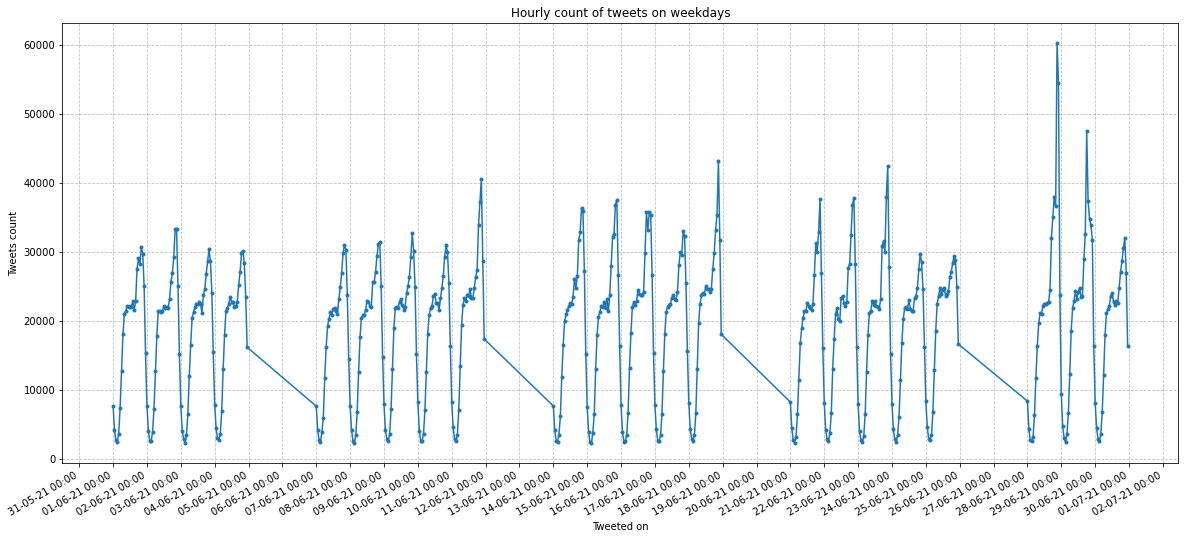

In [ ]:
# Part 1.4 number of tweets at each hour of the day for weekdays and weekends

# resample data to get hourly count of tweets
df_hourly_tweets_count = tweet_df_box_plot.resample('H').count()

# # hourly count of tweets on weekdays  (0-Monday, 1-Tuesday ...)
df_hourly_tweets_weekday = df_hourly_tweets_count[df_hourly_tweets_count.index.weekday.isin([0,1,2,3,4])]
# hourly count of tweets on weekends    (5-Saturday, 6-Sunday)
df_hourly_tweets_weekend = df_hourly_tweets_count[df_hourly_tweets_count.index.weekday.isin([5,6])]

# plot hourly count of tweets on weekdays
fig, ax = plt.subplots(figsize=(20,9))
fig.autofmt_xdate()
ax.set_title('Hourly count of tweets on weekdays')
ax.set_xlabel('Tweeted on')
ax.set_ylabel('Tweets count')
ax.xaxis.set_minor_locator(WeekdayLocator(byweekday=(1),interval=1))
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.plot(df_hourly_tweets_weekday.index, df_hourly_tweets_weekday['tweet_id'], marker='.', label='Weekdays')
plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)

# plot hourly count of tweets on weekend
# fig, ax = plt.subplots(figsize=(20,9))
# fig.autofmt_xdate()
# ax.set_title('Hourly count of tweets on weekends')
# ax.set_xlabel('Tweeted on')
# ax.set_ylabel('Tweets count')
# ax.xaxis.set_minor_locator(WeekdayLocator(byweekday=(1),interval=1))
# ax.xaxis.set_major_locator(DayLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
# plt.plot(df_hourly_tweets_weekend.index, df_hourly_tweets_weekend['tweet_id'], marker='.', label='Weekends')
# plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)
# ax.legend()

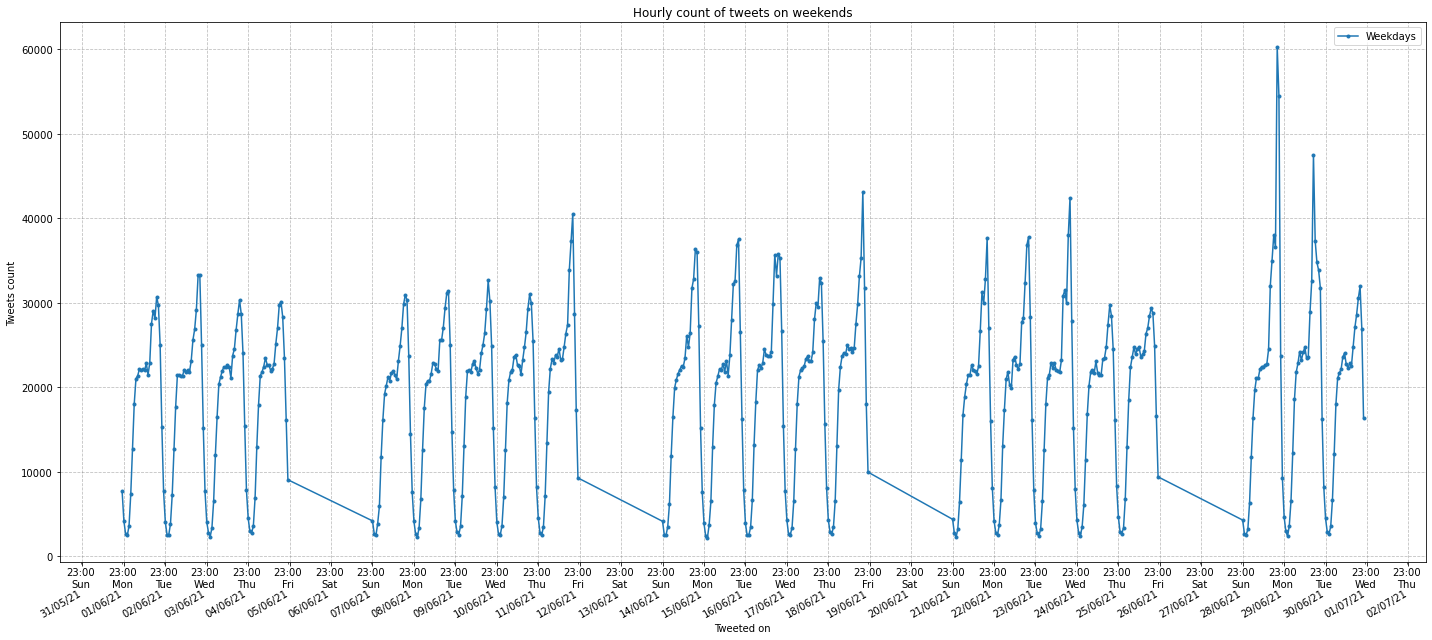

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, WeekdayLocator, DateFormatter

# # resample data to get hourly count of tweets
# df_hourly_tweets_count = tweet_df_plot.resample('H').count()

# # hourly count of tweets on weekdays  (0-Monday, 1-Tuesday ...)
# df_hourly_tweets_weekday = df_hourly_tweets_count[df_hourly_tweets_count.index.weekday.isin([0,1,2,3,4])]
# # hourly count of tweets on weekends    (5-Saturday, 6-Sunday)
# df_hourly_tweets_weekend = df_hourly_tweets_count[df_hourly_tweets_count.index.weekday.isin([5,6])]

# plot hourly count of tweets on weekdays
fig, ax = plt.subplots(figsize=(20,9))
fig.autofmt_xdate()
ax.set_title('Hourly count of tweets on weekends')
ax.set_xlabel('Tweeted on')
ax.set_ylabel('Tweets count')
# ax.xaxis.set_minor_locator(DayLocator(interval=1))
# ax.xaxis.set_major_locator(HourLocator(interval=24))
# ax.xaxis.set_major_formatter(DateFormatter('%d/%H:%M')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%y'))
ax.xaxis.set_minor_locator(HourLocator((0,23)))
ax.xaxis.set_minor_formatter(DateFormatter('%H:%M\n%a'))
# ax.xaxis.grid(True, which='minor')
# ax.yaxis.grid(True)

ax.tick_params(axis="x", which="major", pad=22)

plt.plot(df_hourly_tweets_weekday.index, df_hourly_tweets_weekday['tweet_id'], marker='.', label='Weekdays')
# plt.plot(df_hourly_tweets_weekend.index, df_hourly_tweets_weekend['tweet_id'], marker='.', label='Weekends')
plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()

In [ ]:
df_hourly_tweets_weekday[:10]

,tweet_id,tweet_text,country,user_id,user_name,verified,long,lat,user_mentions
tweeted_at,,,,,,,,,
2021-05-31 23:00:00+00:00,7666,7666,7666,7666,7666,7666,392,392,7666
2021-06-01 00:00:00+00:00,4200,4200,4200,4200,4200,4200,268,268,4200
2021-06-01 01:00:00+00:00,2642,2642,2642,2642,2642,2642,262,262,2642
2021-06-01 02:00:00+00:00,2464,2464,2464,2464,2464,2464,230,230,2464
2021-06-01 03:00:00+00:00,3618,3618,3618,3618,3618,3618,335,335,3618
2021-06-01 04:00:00+00:00,7401,7401,7401,7401,7401,7401,898,898,7401
2021-06-01 05:00:00+00:00,12665,12665,12665,12665,12665,12665,918,918,12665
2021-06-01 06:00:00+00:00,18025,18025,18025,18025,18025,18025,1271,1271,18025
2021-06-01 07:00:00+00:00,21017,21017,21017,21017,21017,21017,1912,1912,21017


### Part 2. Mapping
### Task 1. Draw map of Europe showing the location of GPS tagged tweets

In [ ]:
# Task 1. Draw map of Europe showing the location of GPS tagged tweets

import folium

# provide coordinates of bounding box used to capture the tweets
map = folium.Map([69.1, 81.9],zoom_start=3)
map.fit_bounds([[-24.5, 34.8], [69.1, 81.9]])

# prepate data to draw map of Europe and mark location based on tweets count
countrywise_tweet_count_arr = np.array(tweet_df_plot.country.value_counts())
# get country-wise longitude, latitude coordinates
countrywise_coordinates = tweet_df_plot.groupby('country', dropna=True).agg({'tweet_id':'count','long':'mean', 'lat':'mean'})
long_lat_data = countrywise_coordinates.sort_values(by='tweet_id', ascending=False)[['long', 'lat']]

country_code_data = tweet_df_plot.country.value_counts().index
country_count_data = tweet_df_plot.country.value_counts().values
# normalize the count of twitter messages by country for better plot
scaled_data = np.interp(countrywise_tweet_count_arr, (countrywise_tweet_count_arr.min(), countrywise_tweet_count_arr.max()), (1,20))
longitude_data = long_lat_data['long']
latitude_data = long_lat_data['lat']
# combine and store complete map data 
map_data = [x for x in zip(country_code_data, country_count_data, scaled_data, longitude_data, latitude_data)]

for mapdata in map_data:
    popup_text = f'Country:{mapdata[0]} <br> Tweets:{mapdata[1]}'
    folium.CircleMarker(location=[mapdata[4],mapdata[3]],radius=mapdata[2], color='red', popup=(popup_text), fill=True).add_to(map)

# save generated map as html
map.save('Countrywise_tweets_2.html')

map


### Part 3. 
### Task 3.1: Histogram of tweets per user

Text(0.5, 1.0, 'Tweets per user (for top 5 users)')

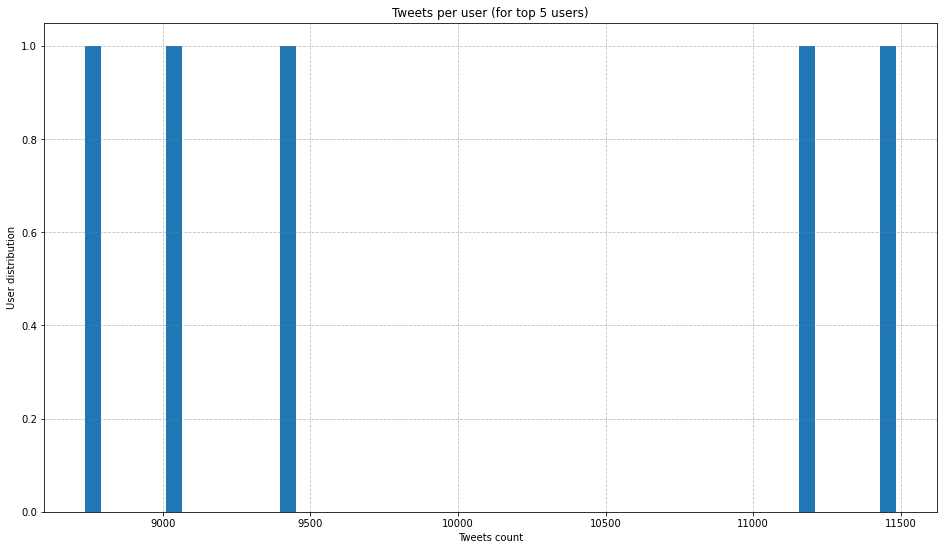

In [ ]:
# Task 3.1: Histogram of tweets per user

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel('Tweets count')
ax.set_ylabel('User distribution')
plt.hist(df_user_tweets.values[:5], bins=50)
plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)
ax.set_title('Tweets per user (for top 5 users)')


### Part 3. Task 3.2: Top 5 users by total number of tweets

In [ ]:
# Task 3.2 Top 5 users by total number of tweets

# tweet_df_pt3 - chunked dataframe with subset of features for all records in the dataset
top_5_users_by_tweet_count = tweet_df_pt3.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)[:5]
top_5_users_by_tweet_count

# top_5_users_by_tweet_count_df =  tweet_df_pt3.query('user_id in @top_5_users_by_tweet_count.index')
# top_5_users_by_tweet_count_df
# (print() for u in top_5_users_by_tweet_count_list)

# top_5_users_by_tweet_count_list = []
print('Top 5 users by total number of tweets...')
for idx, userId in enumerate(top_5_users_by_tweet_count.index, start=1):
    top_user_by_tweet_count = tweet_df_pt3.query('user_id == @userId')['user_name'].iloc[0]
    userName = top_user_by_tweet_count.split(':')[0]
    screenName = top_user_by_tweet_count.split(':')[1]
    print(f'User:{idx} {userName} (@{screenName}) with total tweets: {top_5_users_by_tweet_count.values[idx-1]}')


Top 5 users by total number of tweets...
User:1 L'hora catalana (@HoraCatalana) with total tweets: 11485
User:2 Maria (@Maria70221974) with total tweets: 11178
User:3 Ayfer Gler (@AyferGl02976871) with total tweets: 9416
User:4 casimiroperezcastrosin (@casimiroperezc1) with total tweets: 9059
User:5 Radio TEDDY Playlist (@RadioTeddyMusic) with total tweets: 8736


### Part 3. Task 3.3: Top 5 users who receive the most mentions

In [ ]:
# Task 3.3: Top 5 users who receive the most mentions

import collections

# user mentions are captured as composite string of users(ids) mentioned separated by ':'
user_mentions_data = tweet_df_pt3.user_mentions[tweet_df_pt3.user_mentions.astype(bool)]
user_mentions = [str(u).split(':') for u in user_mentions_data]
# flatten the collection of user mentions
user_mentions_flat = [userMention for userMentionList in user_mentions for userMention in userMentionList]
# count the frequency of user mentions; select top 5 (most common)
userMentionCounter = collections.Counter(user_mentions_flat).most_common(5)

# for um in userMentionCounter:
#     user_mentioned = tweet_df_pt3[tweet_df_pt3['user_id'] == 3131144855]
#     print(f'{um[0]}:{um[1]}')

[('10228272', 17592),
 ('68034431', 13142),
 ('3131144855', 12807),
 ('510948637', 12709),
 ('335141638', 12653)]

In [ ]:
# Task 3.4: 25 combinations

### Part 4. Events

In [ ]:
json_files = [file for file in os.listdir() if file.endswith('.json')]
extracted_dataset_pt4 = []

for jfile in json_files:
    with open(jfile, 'r') as json_file:
        j_data = json_file.readlines()
        for row in range(len(j_data)):
            json_str = json.loads(j_data[row])
            if isinstance(json_str['coordinates'], list):
                long = json_str['coordinates'][0]
                lat = json_str['coordinates'][1]
            else:
                long = lat = json_str['coordinates']
            data = [json_str['tweet_id'], pd.to_datetime(json_str['created_at']), json_str['tweet_text'], json_str['country'], long, lat]
            extracted_dataset_pt4.append(data)
col=['tweet_id', 'tweeted_at', 'tweet_text', 'country', 'long', 'lat']
tweet_df_pt4 = pd.DataFrame(extracted_dataset_pt4, columns=col)
tweet_df_pt4

,tweet_id,tweeted_at,tweet_text,country,long,lat
0,1399500939766210560,2021-05-31 23:00:00+00:00,klingel,,13.435000,52.481388
1,1399500940110094340,2021-05-31 23:00:00+00:00,@HelenaBrts @Sibirskykot @Chadaew Описание сос...,RU,NaN,NaN
2,1399500942043660290,2021-05-31 23:00:00+00:00,po no que un pavo de 51 años me estaba tirando...,GB,NaN,NaN
3,1399500944417640451,2021-05-31 23:00:01+00:00,Hayırlısı ya,TR,NaN,NaN
4,1399500944472166412,2021-05-31 23:00:01+00:00,"01:00\nTemp. 13,5°C App. 12,9°C\nUmid. 77% \nP...",IT,8.987778,44.497500
...,...,...,...,...,...,...
13860681,1410372570411585539,2021-06-30 22:59:58+00:00,All my pictures will have this filter for now ...,GB,NaN,NaN
13860682,1410372571007176704,2021-06-30 22:59:59+00:00,Hola\nTe echo de menos \nAdiós\n🤍,ES,NaN,NaN
13860683,1410372573309849601,2021-06-30 22:59:59+00:00,Acho que vou sozinha para as piscinas amanhã,PT,NaN,NaN
13860684,1410372573544816641,2021-06-30 22:59:59+00:00,@maciek1711 Batem ich! I niech jadą!,ES,NaN,NaN


### Part 4. Task 4.1: 3 days with unusually high activity in 3 different countries

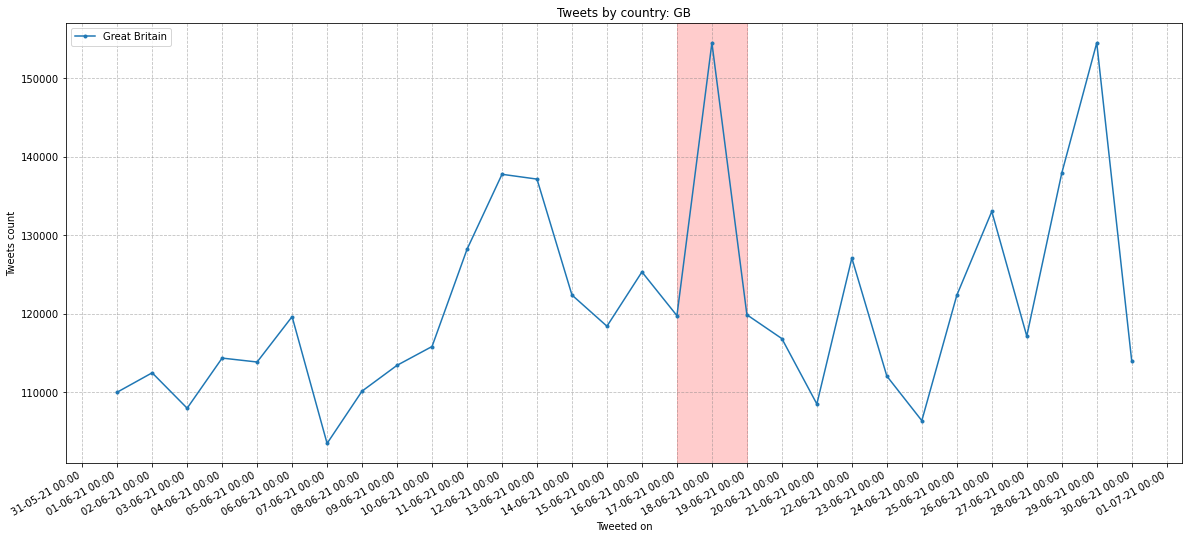

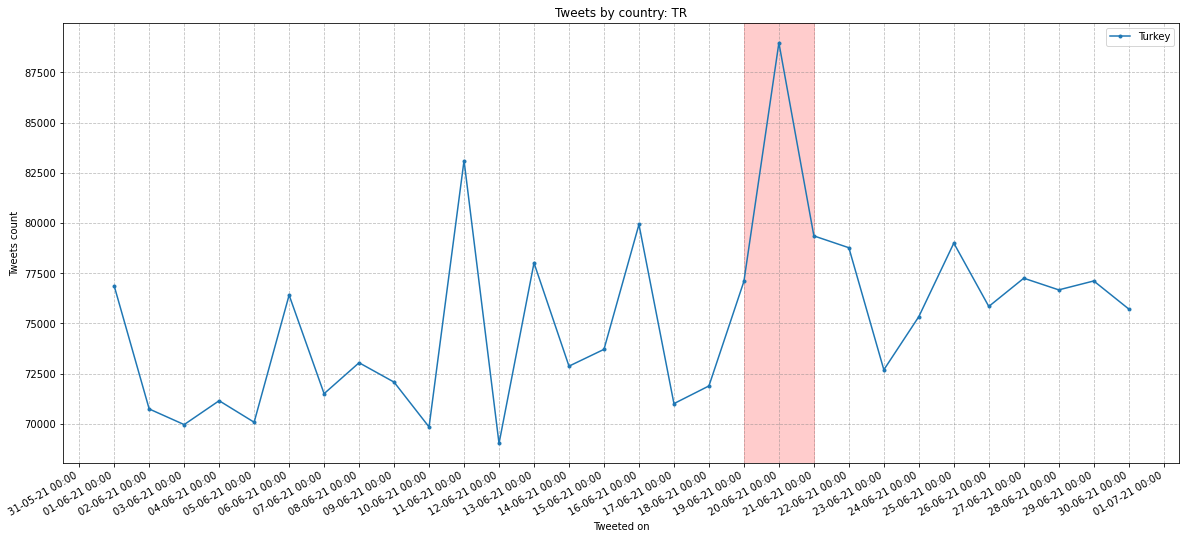

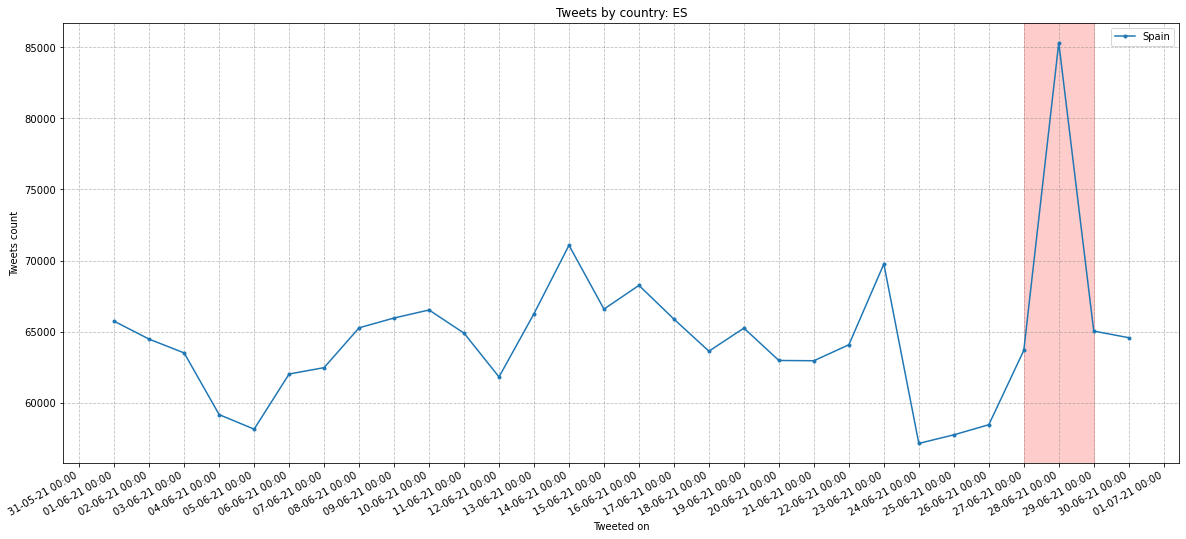

In [ ]:
# Task 4.1: 3 days with unusually high activity in 3 different countries

import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, WeekdayLocator, DateFormatter

def get_data_by_country(country, dataframe, sample):
    df_tweets_by_country = dataframe.query(f'country == "{country}"')
    df_tweets_by_country = df_tweets_by_country.set_index('tweeted_at')

    # convert to local(UK) timezone (to align with dates shown on Twitter frontend)
    gmt_offset = 1
    df_tweets_by_country.index = df_tweets_by_country.index + pd.to_timedelta(gmt_offset, unit='h')

    # resample data to get count of tweets for rule 
    return df_tweets_by_country.resample(sample).count()

def plot_data(data, title, x_label, y_label, plot_label):
    fig, ax = plt.subplots(figsize=(20,9))
    fig.autofmt_xdate()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.xaxis.set_minor_locator(WeekdayLocator(byweekday=(1),interval=1))
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
    plt.grid(b=True, color='gray', linestyle='--', alpha=0.5)
    plt.plot(data.index, data['tweet_id'], marker='.', label=plot_label)
    ax.legend()
    return ax

# plot tweets by Great Britain
daily_tweets_count_by_GB_df = get_data_by_country('GB', tweet_df_pt4, 'D')
ax = plot_data(daily_tweets_count_by_GB_df, 'Tweets by country: Great Britain', 'Tweeted on', 'Tweets count', 'Great Britain')
# highlight unusual activity
ax.axvspan(datetime.datetime(2021, 6, 17), datetime.datetime(2021, 6, 19), color='red', alpha=0.2)

# plot tweets by Turkey
daily_tweets_count_by_TR_df = get_data_by_country('TR', tweet_df_pt4, 'D')
ax = plot_data(daily_tweets_count_by_TR_df, 'Tweets by country: Turkey', 'Tweeted on', 'Tweets count', 'Turkey')
# highlight unusual activity
ax.axvspan(datetime.datetime(2021, 6, 19), datetime.datetime(2021, 6, 21), color='red', alpha=0.2)

# plot tweets by Spain
daily_tweets_count_by_ES_df = get_data_by_country('ES', tweet_df_pt4, 'D')
ax = plot_data(daily_tweets_count_by_ES_df, 'Tweets by country: Spain', 'Tweeted on', 'Tweets count', 'Spain')
# highlight unusual activity
ax.axvspan(datetime.datetime(2021, 6, 27), datetime.datetime(2021, 6, 29), color='red', alpha=0.2)


### Part 4. Task 4.2: Characterize each of these three days

In [ ]:
# Task 4.2: Characterize each of these three days
# make wordcloud of tweets from peak day

from wordcloud import WordCloud, STOPWORDS
import re

def make_wordcloud(data, country_data, country, stop_words):
    peak_day_df = data[data.index.date == country_data[0]]
    # extract tweet text data for country passed
    peak_day_tweet_text = [peak_day_df.query(f'country == "{country}"')['tweet_text']]

    # create stop words to be excluded from the word cloud
    stop_words = set(STOPWORDS)
    stop_words.update(stop_words)
    # extract all tweet text data as one string removing unwanted twitter link shortner data (https://t.co...)
    peak_day_tweet_text_all = ''.join(re.sub(r"https://t.co/\S+", "", tweet) for tweet in peak_day_tweet_text[0])

    # generate word cloud for the given tweet text
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(peak_day_tweet_text_all)
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# set datetime index to ensure time-series data
peak_day_df_idx = tweet_df_pt4.set_index('tweeted_at')

# # peak day if tweets by Great Britain
peak_date_gb = df_daily_tweets_count_by_GB.sort_values(by='tweet_id', ascending=False)[:1].index.date
peak_day_gb_df = peak_day_df_idx[peak_day_df_idx.index.date == peak_date_gb[0]]
make_wordcloud(peak_day_gb_df, peak_date_gb, 'GB', ['one', 'will', 'S'])

# peak day if tweets by Turkey
peak_date_tr = df_daily_tweets_count_by_TR.sort_values(by='tweet_id', ascending=False)[:1].index.date
peak_day_tr_df = peak_day_df_idx[peak_day_df_idx.index.date == peak_date_tr[0]]
make_wordcloud(peak_day_tr_df, peak_date_tr, 'TR', [''])

# peak day if tweets by Spain
peak_date_es = df_daily_tweets_count_by_ES.sort_values(by='tweet_id', ascending=False)[:1].index.date
peak_day_es_df = peak_day_df_idx[peak_day_df_idx.index.date == peak_date_es[0]]
make_wordcloud(peak_day_es_df, peak_date_es, 'ES', [''])


### Part 4. Task 4.2: Characterize each of these three days

In [ ]:
# Task 4.2: Characterize each of these three days
# plot tweet locations on map

import folium
import datetime

def draw_geo_map(country, dataset, peakday):
    # provide coordinates of bounding box used to capture the tweets
    map = folium.Map([69.1, 81.9],zoom_start=3)
    map.fit_bounds([[-24.5, 34.8], [69.1, 81.9]])

    tweets_count_country_df = dataset.query(f'country == "{country}"')
    peak_day_tweets_df = tweets_count_country_df[tweets_count_country_df.index.date == peakday]

    # prepate data to draw map of Europe and mark location based on tweets count
    map_data = get_map_data(peak_day_tweets_df)

    for mapdata in map_data:
        popup_text = f'User in: <b>{country}</b> tweeted: <b>"{mapdata[0]}"</b>'
        folium.CircleMarker(location=[mapdata[2],mapdata[1]],radius=2, color='red', popup=(popup_text), tooltip=popup_text, fill=True).add_to(map)

    # save generated map as html
    map.save(f'peak_day_tweet_locations_with_data_{country}.html')
    return map

def get_map_data(dataset):
    peak_day_tweets_gb_df = dataset.dropna()[['tweet_text','long','lat']]
    peak_day_tweet_text_data = peak_day_tweets_gb_df['tweet_text']
    peak_day_longitude_data = peak_day_tweets_gb_df['long']
    peak_day_latitude_data = peak_day_tweets_gb_df['lat']

    # combine and store complete map data 
    return [data for data in zip(peak_day_tweet_text_data, peak_day_longitude_data, peak_day_latitude_data)]

# chunked dataset for tweets events
tweet_events_df = tweet_df.copy()

# peak day tweets location for Great Britain
draw_geo_map('GB', tweet_events_df, datetime.datetime(2021, 6, 18).date())

# peak day tweets location for Turkey
draw_geo_map('TR', tweet_events_df, datetime.datetime(2021, 6, 20).date())

# # # peak day tweets location for Spain
draw_geo_map('ES', tweet_events_df, datetime.datetime(2021, 6, 28).date())

In [ ]:
# temp_gb_df = tweet_events_df.query(f'country == "GB"')
# peak_day_tweets_df = temp_gb_df[temp_gb_df.index.date == datetime.datetime(2021, 6, 18).date()]
# peak_day_tweets_df[peak_day_tweets_df.verified][:20]

# temp_tr_df = tweet_events_df[tweet_events_df['country'] == "TR"]
# peak_day_tweets_df = temp_tr_df[temp_tr_df.index.date == datetime.datetime(2021, 6, 20).date()]
peak_day_tweets_df[peak_day_tweets_df['tweet_text'].str.contains('@RTErdogan')]

,tweet_id,tweet_text,country,user_id,user_name,verified,long,lat,user_mentions
tweeted_at,,,,,,,,,
2021-06-20 00:05:16+00:00,1406387634092531716,Babalar Günün Kutlu Olsun Reis Ellerinden Öper...,TR,99972660,etin Erdoan:xcerdogan,False,NaN,NaN,68034431
2021-06-20 00:06:29+00:00,1406387943179227136,Babalar Günün Kutlu Olsun Reis Ellerinden Öper...,TR,99972660,etin Erdoan:xcerdogan,False,NaN,NaN,68034431
2021-06-20 00:31:07+00:00,1406394139936276481,Sayın başkanım babalar günün kutlu olsun mille...,TR,1363884253273067535,Glhan yosunlukaya #Evdekal:Glhanyosunluka2,False,NaN,NaN,68034431
2021-06-20 00:33:39+00:00,1406394780758777861,@Akparti @RTErdogan https://t.co/rXcIhb3AQh,TR,1256969838297309186,Hamza Aydogan:HamzaAydogan6,False,NaN,NaN,1628824092:68034431
2021-06-20 00:45:30+00:00,1406397759746412550,@_sahinkya @RTErdogan @Akparti karar verme iş...,TR,2874762561,Mustafa NAZLL #BizBizeYeterizTRKYEM:TBxGkPzXMJv0,False,NaN,NaN,1216612843:68034431:1628824092
...,...,...,...,...,...,...,...,...,...
2021-06-20 23:03:48+00:00,1406734555902627842,@RTErdogan 🇹🇷🇹🇷,TR,515347670,N.Kbra Gner:nkubraguner,False,NaN,NaN,68034431
2021-06-20 23:06:17+00:00,1406735181617246211,@AKGenclikGM @RTErdogan Sevdamın adı @RTErdogan 🧡,TR,1682924503,Zehra Gm:zehragumus34,False,NaN,NaN,211479204:68034431:68034431
2021-06-20 23:18:54+00:00,1406738356441059330,@RTErdogan bu videoyu izle bak 😏\nArkadaş iyi ...,TR,169031109,irade Topu:iradetopcu,False,NaN,NaN,68034431:489399217


In [ ]:
# temp_es_df = tweet_events_df[tweet_events_df['country'] == "ES"]
# peak_day_tweets_es_df = temp_es_df[temp_es_df.index.date == datetime.datetime(2021, 6, 28).date()]
peak_day_tweets_es_df[peak_day_tweets_es_df.verified][40:80]
# peak_day_tweets_es_df[peak_day_tweets_es_df['user_name'].str.contains('catalana:HoraCatalana')]

,tweet_id,tweet_text,country,user_id,user_name,verified,long,lat,user_mentions
tweeted_at,,,,,,,,,
2021-06-28 05:58:43+00:00,1409375686557569024,#OBRAS nivel AMARILLO en CARRETERA #Ma5020 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,3.015363,39.511795,
2021-06-28 05:58:43+00:00,1409375687417413632,#OBRAS nivel AMARILLO en CARRETERA #Ma3017 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:43+00:00,1409375688277245955,#OBRAS nivel AMARILLO en CARRETERA #Ma1110 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:43+00:00,1409375689124499456,#OBRAS nivel AMARILLO en CARRETERA #Ma3140 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:44+00:00,1409375690034647043,#OBRAS nivel AMARILLO en CARRETERA #Ma3013 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:44+00:00,1409375690965884928,#OBRAS nivel AMARILLO en CARRETERA #Ma13A (pk ...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:44+00:00,1409375691838263296,#OBRAS nivel AMARILLO en CARRETERA #Ma2022 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:44+00:00,1409375692685447173,#OBRAS nivel AMARILLO en CARRETERA #Ma3010 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
2021-06-28 05:58:44+00:00,1409375693541187587,#OBRAS nivel AMARILLO en CARRETERA #Ma2030 (pk...,ES,974022020,D.G.T.:InformacionDGT,True,2.767673,39.648186,
